In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('USvideos.csv')
new_df = dataset[['title','channel_title','category_id','publish_time','tags','description','views']].copy()
new_df.head()

,title,channel_title,category_id,publish_time,tags,description,views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,748374
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,3191434
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,343168
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,2095731


In [21]:
with open('US_category_id.json') as f:
    datastore = json.load(f)
print(datastore['items'][0])
for d in datastore['items']:
    iden = d['id']
    names = d['snippet']['title']
    print((iden,names))

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
('1', 'Film & Animation')
('2', 'Autos & Vehicles')
('10', 'Music')
('15', 'Pets & Animals')
('17', 'Sports')
('18', 'Short Movies')
('19', 'Travel & Events')
('20', 'Gaming')
('21', 'Videoblogging')
('22', 'People & Blogs')
('23', 'Comedy')
('24', 'Entertainment')
('25', 'News & Politics')
('26', 'Howto & Style')
('27', 'Education')
('28', 'Science & Technology')
('29', 'Nonprofits & Activism')
('30', 'Movies')
('31', 'Anime/Animation')
('32', 'Action/Adventure')
('33', 'Classics')
('34', 'Comedy')
('35', 'Documentary')
('36', 'Drama')
('37', 'Family')
('38', 'Foreign')
('39', 'Horror')
('40', 'Sci-Fi/Fantasy')
('41', 'Thriller')
('42', 'Shorts')
('43', 'Shows')
('44', 'Trailers')


In [5]:
# data cleaning and preparation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

new_df.head()

,title,channel_title,category_id,publish_time,tags,description,views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,748374
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,3191434
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,343168
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,2095731


In [6]:
title = re.sub('[^a-zA-Z]', '', new_df['title'][0])
title
new_df['description']

0        SHANTELL'S CHANNEL - https://www.youtube.com/s...
1        One year after the presidential election, John...
2        WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3        Today we find out if Link is a Nickelback amat...
4        I know it's been a while since we did this sho...
                               ...                        
40944       The Cat Who Caught the Laser - Aaron's Animals
40945                                                  NaN
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 40949, dtype: object

In [7]:
# data transformation
def process(items):
    corpus = []
    for s in items:
        s = re.sub('[^a-zA-Z]', ' ', s)
        s = s.lower()
        s = s.split()
        ps = PorterStemmer()
        s = [ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
        s = ' '.join(s)
        corpus.append(s)
    return corpus

title = process(new_df['title'])
channel_title = process(new_df['channel_title'])
tags= process(new_df['tags'])

In [8]:
# data transformation: for just description
def process_des(items):
    corpus = []
    for s in items:
        if type(s)==str:
            s = re.sub('[^a-zA-Z]', ' ', s)
            s = s.lower()
            s = re.sub(r'^https?:\/\/.*[\r\n]*', '', s, flags=re.MULTILINE)
            #print(s)
            s = s.split()
            ps = PorterStemmer()
            s = [ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
            s = ' '.join(s)
            corpus.append(s)
        else:
            corpus.append('')
    return corpus
description= process_des(new_df['description'])

In [17]:
# # Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

agg_str = []
for i in range(40949):
    agg_str.append(title[i]+channel_title[i]+tags[i]+description[i])
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(agg_str).toarray()
np.shape(X)

(40949, 3000)

In [14]:
new_df['popularity'] = pd.cut(new_df.views, bins=[0,10000,100000,1000000,1000000000], labels=[1,2,3,4])
p1 = new_df.index[new_df['popularity'] == 1].tolist()
p2 = new_df.index[new_df['popularity'] == 2].tolist()
p3 = new_df.index[new_df['popularity'] == 3].tolist()
p4 = new_df.index[new_df['popularity'] == 4].tolist()

In [17]:
y = new_df.iloc[:,7].values
y = y.astype(int)
y

array([3, 4, 4, ..., 4, 4, 4])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[ 144,   17,    1,    0],
       [ 230,  595,   36,   17],
       [ 413, 1497, 1520,  443],
       [ 214,  801,  346, 1916]])

In [48]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
#print(accuracy_score(y_test, y_pred))
#print(cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['1','2','3','4']))

              precision    recall  f1-score   support

           1       0.14      0.89      0.25       162
           2       0.20      0.68      0.31       878
           3       0.80      0.39      0.53      3873
           4       0.81      0.58      0.68      3277

    accuracy                           0.51      8190
   macro avg       0.49      0.64      0.44      8190
weighted avg       0.73      0.51      0.56      8190



In [20]:
# sentiment analysis
from textblob import TextBlob

positive = [0]*40949
for i in range(40949):
    zen = TextBlob(agg_str[i])
    if zen.sentiment.polarity > 0:
        positive[i] = 1

In [21]:
sum(positive)/len(positive)

0.7072944394246502

In [26]:
res1 = 0
for i in p1:
    res1+= positive[i]
print(res1/len(p1))
res1 = 0
for i in p2:
    res1+= positive[i]
print(res1/len(p2))
res1 = 0
for i in p3:
    res1+= positive[i]
print(res1/len(p3))
res1 = 0
for i in p4:
    res1+= positive[i]
print(res1/len(p4))

0.5767835550181378
0.7119697979125028
0.7181242867517378
0.6998347714338168


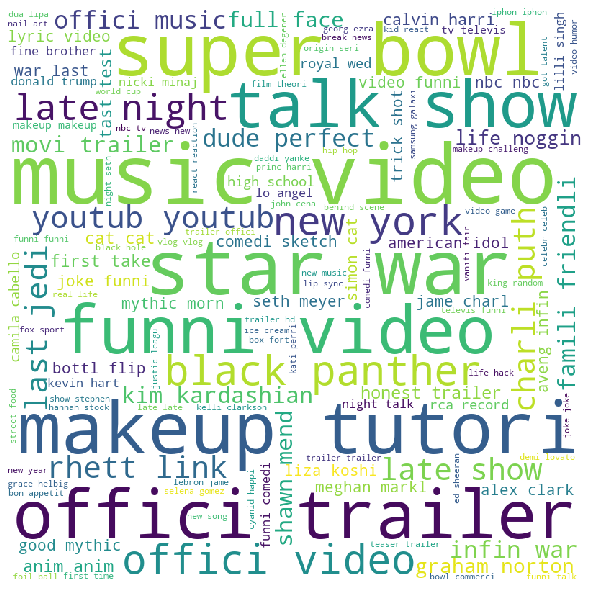

In [54]:

# Python program to generate WordCloud 
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
 
edit_str = []   
for i in range(40949):
    edit_str.append(title[i]+channel_title[i]+tags[i])
                   
comment_words = ' '.join(edit_str)
stopwords = set(STOPWORDS) 
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

(-0.5, 879.5, 656.5, -0.5)

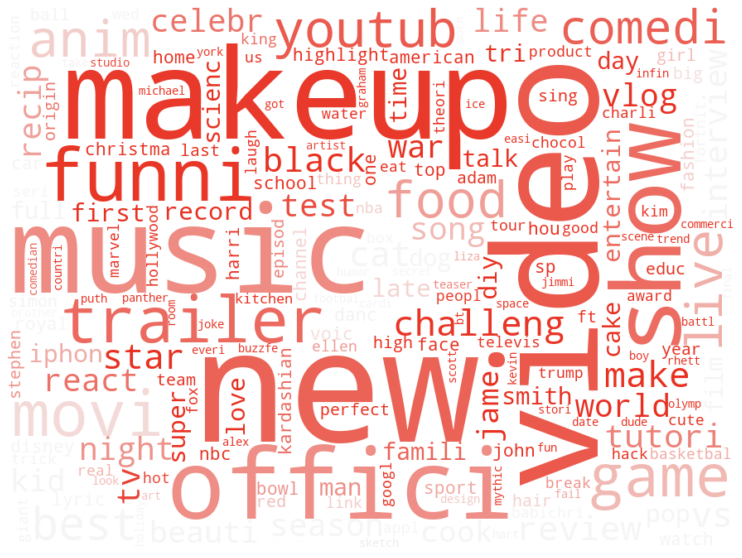

In [103]:
# create coloring from image
import random
from wordcloud import ImageColorGenerator
from PIL import Image

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)
    
mask = np.array(Image.open("youtube-t.png"))

wordcloud_youtube = WordCloud(stopwords=stopwords, background_color="white", 
                          mode="RGBA", mask=mask,collocations=False).generate(comment_words)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[30,10])
#plt.imshow(wordcloud_youtube) 
plt.imshow(wordcloud_youtube.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [83]:
with open("cloud.txt", "w") as text_file:
    text_file.write(comment_words)

In [ ]:
from collections import Counter

words = []
for t in title:
    words+=t.split(' ')
for t in tags:
    words+=t.split(' ')
for t in channel_title:
    words+=t.split(' ')
Counter(words).most_common(100)

NameError: name 'comment_words' is not defined